### Regression Metrices
$$ \text {Mean Squared Error} \quad  = \quad \frac {\sum\limits_{i=1}^N \quad {(\hat y_i - y_i)}^2 } {N} $$

$$R^2\text { score} \quad = \quad 1 - \frac { RSS} {TSS} $$

$$TSS \quad = \quad \sum \limits_{i=1}^N \quad {(y_i - \bar y)}^2 $$

$$RSS \quad = \quad \sum\limits_{i=0}^N \quad {(y_i - \hat y_i)} ^2 $$


here __$y_i$__ is actual target value, and __$\hat y_i$__ is predicted value

### Classification Metrices

    Binary Classification is used predict yes or no , true or false, postive or negative

    Categorical data is analyzied on the basis of proportions of the classes in it

    [ male , female, male, female, female, male, female, male, female]
    
    male    -  4
    
    female  -  5

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.dpi'] = 300


`Breast Cancer Dataset`

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [6]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [7]:
cancer_df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [8]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
target = pd.Series(cancer['target'])
target_name = cancer['target_names']

In [12]:
target.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

In [13]:
target_name

array(['malignant', 'benign'], dtype='<U9')

In [14]:
target.sum()

357

In [15]:
target.shape

(569,)

In [16]:
target.shape[0] - target.sum()

212

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int32

In [18]:
cancer_df['target'] = target

In [22]:
target_name

array(['malignant', 'benign'], dtype='<U9')

In [23]:
malignant = cancer_df[cancer_df['target']==0]

In [25]:
benign = cancer_df[cancer_df['target']==1]

In [26]:
malignant.shape

(212, 31)

In [27]:
benign.shape

(357, 31)

In [29]:
benign = benign.sample(212)

In [30]:
benign.shape

(212, 31)

In [31]:
malignant.shape

(212, 31)

In [32]:
data = pd.concat([malignant, benign])

In [33]:
data.shape

(424, 31)

In [35]:
features = data.drop('target', axis=1)

In [36]:
target = data['target']

In [37]:
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [39]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [43]:
X_train.shape

(339, 30)

In [44]:
X_test.shape

(85, 30)

In [45]:
y_train.sum()

174

In [46]:
y_train.shape

(339,)

In [47]:
339 - 174

165

In [48]:
y_test.shape

(85,)

In [49]:
y_test.sum()

38

In [50]:
85-38

47

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
model = LogisticRegression(solver='lbfgs')

Training

In [53]:
model.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
outcome = model.predict(X_test)

In [55]:
outcome

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

In [57]:
y_test.to_numpy()

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [61]:
y_test.sum() # actual benign

38

In [58]:
outcome.sum() # class 1 benign

42

__we have missclassified 4 outcomes as benign which are malignant__

In [62]:
y_test.shape[0] - y_test.sum()

47

In [60]:
outcome.shape[0] - outcome.sum() # class 0 malignant

43

    actual benign - 38
    
    predict benign - 42 

    actual malignant - 47
    
    predcit malignant - 43

In [66]:
100 - 4/85*100

95.29411764705883

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [69]:
y_test.to_numpy()

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [70]:
outcome

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

In [72]:
m = confusion_matrix(y_test, outcome)
print(m)

[[43  4]
 [ 0 38]]


In [96]:
print((43+38)/(47+38))

0.9529411764705882


In [93]:
print(f"Accuracy : {accuracy_score(y_test, outcome)*100:.2f}")

Accuracy : 95.29


In [77]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [76]:
# 0 malignant
y_test.sum() # 1 benign

38

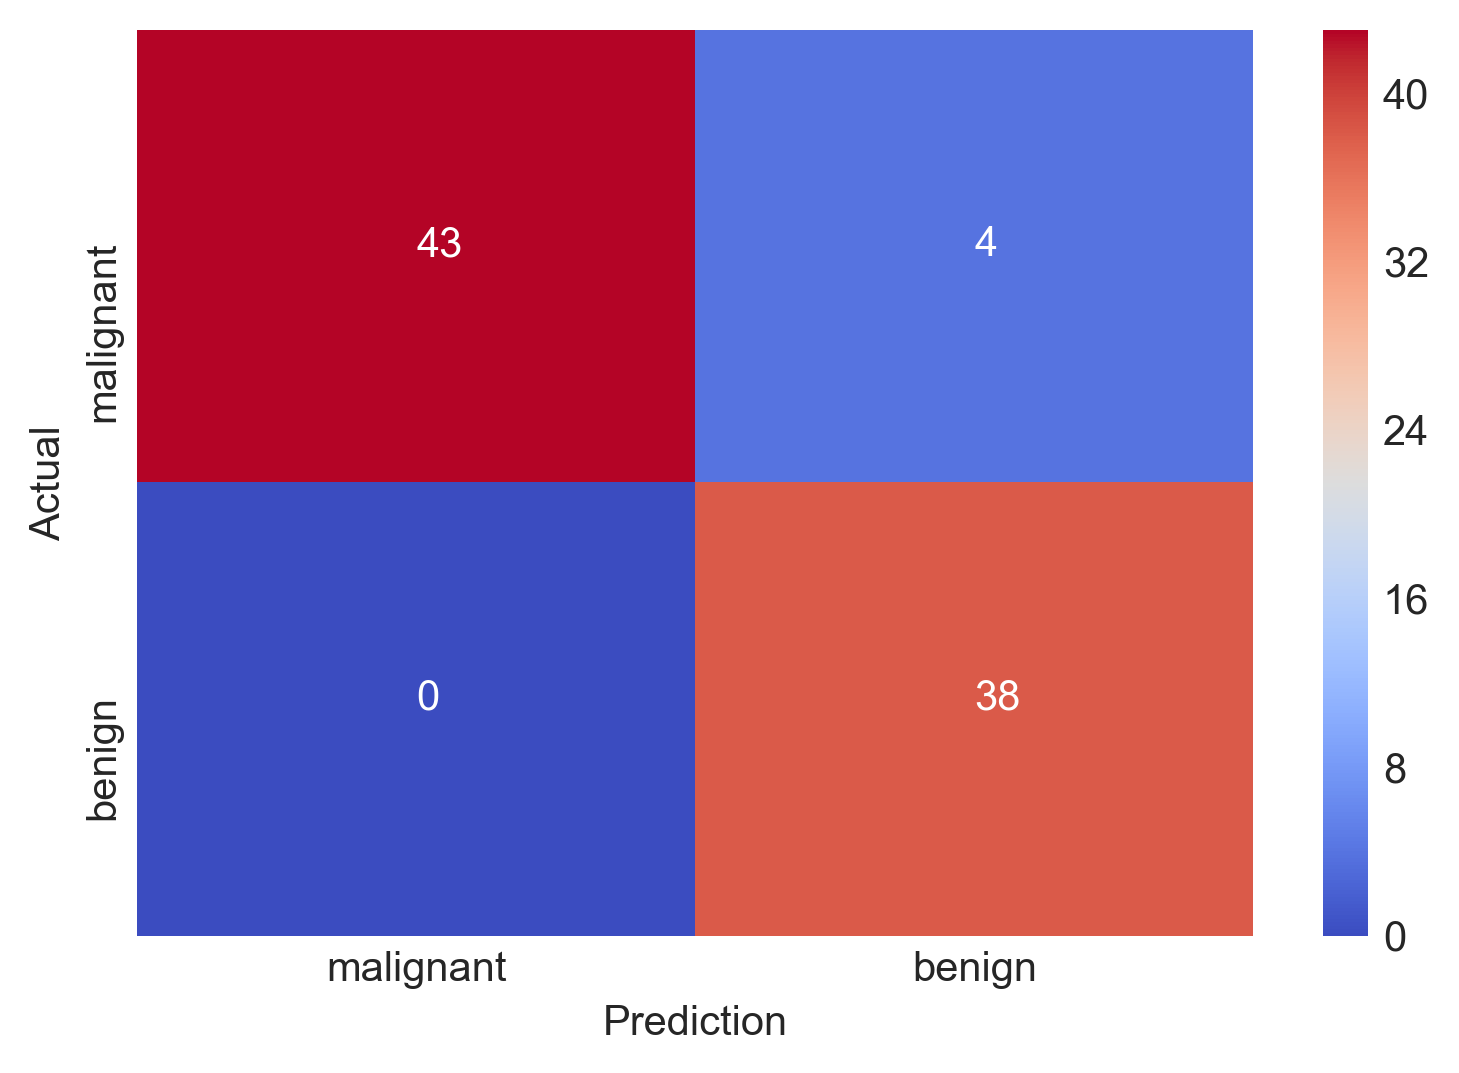

In [110]:
plt.figure(dpi=300)
sns.heatmap(m, cmap='coolwarm')
plt.xticks([0.5, 1.5], ['malignant', 'benign'])
plt.yticks([0.5, 1.5], ['malignant', 'benign'])
plt.text(0.5, 0.5, s=m[0,0], color='white')
plt.text(1.5, 0.5, s=m[0, 1], color='white')
plt.text(0.5, 1.5, s=m[1, 0], color='white')
plt.text(1.5, 1.5, s=m[1, 1], color='white')
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [97]:
print(classification_report(y_test, outcome))

              precision    recall  f1-score   support

           0       1.00      0.91      0.96        47
           1       0.90      1.00      0.95        38

    accuracy                           0.95        85
   macro avg       0.95      0.96      0.95        85
weighted avg       0.96      0.95      0.95        85



`ROC and AUC Curves are usefull to compare different models`

### k-Nearest Neighbours

In [114]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


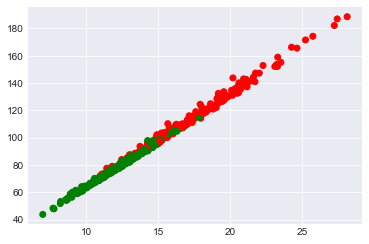

In [121]:
c = list(map(lambda value : 'red' if value == 0 else 'green', cancer['target']))
plt.scatter(cancer_df['mean radius'],cancer_df['mean perimeter'], c=c)
plt.show()

__K-NN__